In [46]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [47]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [48]:
X_train.shape

(50000, 32, 32, 3)

In [49]:
X_test.shape

(10000, 32, 32, 3)

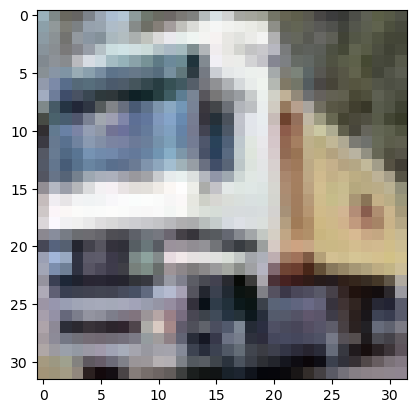

In [50]:
plt.imshow(X_train[1])

In [51]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [52]:
# đổi y_train, y_test thành mảng 1 chiều

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

y_train[:5], y_test[:5]

(array([6, 9, 9, 4, 1], dtype=uint8), array([3, 8, 8, 0, 6], dtype=uint8))

In [53]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [54]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

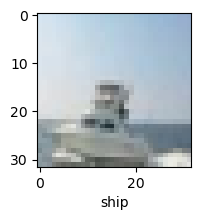

In [55]:
plot_sample(X_train, y_train, 100)

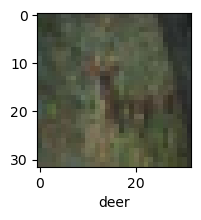

In [56]:
plot_sample(X_train, y_train, 10)

In [57]:
# scale value

X_train = X_train / 255
X_test = X_test / 255

In [77]:
# build model 
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [78]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
 

In [79]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1152)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [60]:
cnn.fit(X_train, y_train, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 52s 31ms/step - loss: 1.5218 - accuracy: 0.4499
Epoch 2/2
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1829 - accuracy: 0.5826


In [61]:
y_train[0]

6

In [62]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.0876 - accuracy: 0.6180


[1.087580919265747, 0.6179999709129333]

In [63]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[3.1209642e-02, 1.2986865e-03, 9.0886407e-02, 6.4205736e-01,
        1.1228701e-02, 1.2462947e-01, 4.3678459e-02, 6.7829094e-03,
        4.4863913e-02, 3.3643243e-03],
       [5.5076215e-02, 4.8442996e-01, 1.7770725e-04, 1.0764452e-04,
        3.3099440e-04, 1.0304807e-05, 3.8272092e-06, 2.1058144e-05,
        3.6740246e-01, 9.2439778e-02],
       [9.6115589e-02, 1.6068295e-01, 7.1449499e-03, 4.3996978e-03,
        3.3492069e-03, 5.8650190e-04, 6.7582540e-04, 1.3219634e-03,
        6.6998607e-01, 5.5737250e-02],
       [4.4041574e-01, 5.4192292e-03, 1.3330101e-02, 1.1447442e-03,
        6.6727488e-03, 4.7490812e-05, 5.8816647e-04, 9.3788207e-05,
        5.3090143e-01, 1.3865825e-03],
       [9.9911413e-04, 1.0393707e-03, 4.1725092e-02, 7.1373835e-02,
        5.4418325e-01, 2.7715547e-02, 3.0840769e-01, 2.8870830e-03,
        1.4549708e-03, 2.1402386e-04]], dtype=float32)

In [64]:
# trả về vị trí của phần tử có gtri max
np.argmax([1,12, 5, 9])

1

In [65]:
y_pred = [np.argmax(i) for i in y_pred]

In [66]:
y_pred[:5]

[3, 1, 8, 8, 4]

In [67]:
from sklearn.metrics import classification_report

In [68]:
print('classification_report: \n', classification_report(y_test, y_pred))

classification_report: 
               precision    recall  f1-score   support

           0       0.64      0.66      0.65      1000
           1       0.70      0.77      0.73      1000
           2       0.45      0.50      0.48      1000
           3       0.44      0.45      0.45      1000
           4       0.59      0.55      0.57      1000
           5       0.60      0.45      0.51      1000
           6       0.73      0.68      0.71      1000
           7       0.68      0.69      0.68      1000
           8       0.67      0.74      0.71      1000
           9       0.67      0.70      0.68      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000

